In [2]:
# ------------------------------------------define logging and working directory
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
# ------------------------------------------jupyter magic config
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# ------------------------------------------ import helpers
# this should import glob, os, and some other standard libs to keep this cell clean
# local imports
import tensorflow as tf
tf.get_logger().setLevel('FATAL')

from src.utils.Notebook_imports import *
from src.utils.Utils_io import Console_and_file_logger, init_config
from src.data.Dataset import get_trainings_files
from src.data.Dataset import get_patients, get_patient
from src.data.Dataset import describe_sitk
from src.models.predict_4d_on_seg import predict_4d_on_2d_cv

from ipyfilechooser import FileChooser
from src.data.SegGenerators import DataGenerator
import glob
import SimpleITK as sitk
import pandas as pd
Console_and_file_logger('temp')

2022-05-18 11:44:46,161 INFO -------------------- Start --------------------
2022-05-18 11:44:46,162 INFO Working directory: /mnt/ssd/git/cmr-phase-detection.
2022-05-18 11:44:46,162 INFO Log file: ./logs/temp.log
2022-05-18 11:44:46,162 INFO Log level for console: INFO


search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/cmr-phase-detection


# Collect a list of 4D CMR files for inference

In [3]:
# acdc 4d files
files_ = sorted(glob.glob('/mnt/ssd/data/acdc/2D/original/all/*/*4d.nii.gz'))
logging.info('4D files: {}'.format(len(files_)))

2022-05-18 11:44:50,202 INFO 4D files: 100


In [96]:
# tof 4d files
files_ = sorted(glob.glob('/mnt/ssd/data/tof/02_imported_4D_unfiltered/original/*clean.nrrd'))
logging.info('4D files: {}'.format(len(files_)))

2022-05-08 20:23:21,367 INFO 4D files: 278


# Predict 4D Masks based on a 2D segmentation model

In [4]:
# define a path to a 2D segmentation experiment
exp = '/mnt/ssd/git/rvip_landmark_detection/exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/'
pred_path = 'exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/pred_4d_cv'

In [8]:
pred_path = predict_4d_on_2d_cv(path_to_exp=exp,
                                list_of_4d=files_,
                               export_suffix='test_pred_4d_cv')

2022-05-16 15:55:16,743 INFO found: 4 cfgs.
2022-05-16 15:55:16,743 INFO got 100 files for inference
2022-05-16 15:55:16,774 INFO expect 25 patients for validation in fold 0
2022-05-16 15:55:16,775 INFO 4d files filtered: 25
2022-05-16 15:55:16,776 INFO Create model


build u-net for input shape:  (None, 224, 224, 1)


/home/sven/anaconda3/envs/dcmr/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-16 15:55:17,421 INFO loaded model weights as h5 file
2022-05-16 15:55:17,608 INFO found 25 4D files, will return one generator per file with t x z slices
2022-05-16 15:55:17,907 INFO x_sliced: 300, example: data/interim/patient001_4d_t0_z0_img.nrrd
2022-05-16 15:55:17,908 INFO inference mode, no masks given, will use x as placeholder for y in fix processing
2022-05-16 15:55:17,908 INFO Create DataGenerator
2022-05-16 15:55:17,909 INFO Datagenerator created with: 
 shape: [224, 224]
 spacing: [1.2, 1.2]
 batchsize: 1
 Scaler: MinMax
 Images: 300 
 Augment: False 
 Thread workers: 32
2022-05-16 15:55:18,272 INFO x_sliced: 300, example: data/interim/patient002_4d_t0_z0_img.nrrd
2022-05-16 15:55:18,272 INFO inference mode, no masks given, will use x as placeholder for y in f

(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:33,524 INFO size: (208, 256, 10, 35)
2022-05-16 15:55:33,525 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:55:33,525 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:33,526 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:33,526 INFO pixel type: 32-bit float
2022-05-16 15:55:33,526 INFO number of pixel components: 1


(224, 224, 10, 35)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:36,218 INFO size: (192, 256, 10, 30)
2022-05-16 15:55:36,218 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-16 15:55:36,219 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:36,219 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:36,219 INFO pixel type: 32-bit float
2022-05-16 15:55:36,219 INFO number of pixel components: 1
2022-05-16 15:55:38,540 INFO size: (216, 256, 8, 13)
2022-05-16 15:55:38,541 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:55:38,541 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:38,541 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:38,541 INFO pixel type: 32-bit float
2022-05-16 15:55:38,542 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:39,515 INFO size: (240, 256, 10, 30)
2022-05-16 15:55:39,516 INFO spacing: (1.6796875, 1.6796875, 10.0, 1.0)
2022-05-16 15:55:39,516 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:39,516 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:39,516 INFO pixel type: 16-bit signed integer
2022-05-16 15:55:39,517 INFO number of pixel components: 1


(224, 224, 8, 13)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:41,741 INFO size: (200, 256, 7, 28)
2022-05-16 15:55:41,742 INFO spacing: (1.40625, 1.40625, 10.0, 1.0)
2022-05-16 15:55:41,742 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:41,742 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:41,743 INFO pixel type: 16-bit signed integer
2022-05-16 15:55:41,743 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:43,281 INFO size: (192, 256, 11, 30)
2022-05-16 15:55:43,281 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:55:43,281 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:43,282 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:43,282 INFO pixel type: 16-bit signed integer
2022-05-16 15:55:43,282 INFO number of pixel components: 1


(224, 224, 7, 28)
(1.2, 1.2, 10.0, 1)
(224, 224, 11, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:45,827 INFO size: (216, 256, 8, 35)
2022-05-16 15:55:45,828 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-16 15:55:45,828 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:45,829 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:45,829 INFO pixel type: 32-bit float
2022-05-16 15:55:45,829 INFO number of pixel components: 1


(224, 224, 8, 35)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:48,150 INFO size: (276, 384, 8, 24)
2022-05-16 15:55:48,150 INFO spacing: (0.8333330154418945, 0.8333330154418945, 10.0, 1.0)
2022-05-16 15:55:48,151 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:48,151 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:48,151 INFO pixel type: 32-bit float
2022-05-16 15:55:48,152 INFO number of pixel components: 1
2022-05-16 15:55:49,581 INFO size: (154, 224, 6, 17)
2022-05-16 15:55:49,581 INFO spacing: (1.7857099771499634, 1.7857099771499634, 10.0, 1.0)
2022-05-16 15:55:49,582 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:49,582 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:49,582 INFO pixel type: 32-bit float
2022-05-16 15:55:49,582 INFO number of pixel components: 1


(224, 224, 8, 24)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:50,550 INFO size: (232, 256, 9, 35)
2022-05-16 15:55:50,550 INFO spacing: (1.7578125, 1.7578125, 10.0, 1.0)
2022-05-16 15:55:50,550 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:50,551 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:50,551 INFO pixel type: 16-bit signed integer
2022-05-16 15:55:50,551 INFO number of pixel components: 1


(224, 224, 6, 17)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:52,870 INFO size: (256, 216, 7, 35)
2022-05-16 15:55:52,871 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:55:52,871 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:52,871 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:52,872 INFO pixel type: 16-bit signed integer
2022-05-16 15:55:52,872 INFO number of pixel components: 1


(224, 224, 9, 35)
(1.2, 1.2, 10.0, 1)
(224, 224, 7, 35)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:54,821 INFO size: (216, 256, 9, 30)
2022-05-16 15:55:54,821 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:55:54,822 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:54,822 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:54,823 INFO pixel type: 32-bit float
2022-05-16 15:55:54,823 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:55:56,960 INFO size: (216, 256, 9, 30)
2022-05-16 15:55:56,960 INFO spacing: (1.40625, 1.40625, 10.0, 1.0)
2022-05-16 15:55:56,961 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:56,961 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:56,961 INFO pixel type: 32-bit float
2022-05-16 15:55:56,961 INFO number of pixel components: 1
2022-05-16 15:55:58,981 INFO size: (216, 256, 9, 30)
2022-05-16 15:55:58,981 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:55:58,982 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:55:58,982 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:55:58,983 INFO pixel type: 16-bit signed integer
2022-05-16 15:55:58,984 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:00,997 INFO size: (256, 216, 10, 30)
2022-05-16 15:56:00,997 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:56:00,998 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:00,998 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:00,998 INFO pixel type: 16-bit signed integer
2022-05-16 15:56:00,998 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:03,219 INFO size: (216, 256, 7, 30)
2022-05-16 15:56:03,220 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:56:03,220 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:03,220 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:03,221 INFO pixel type: 32-bit float
2022-05-16 15:56:03,221 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 7, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:04,982 INFO size: (256, 256, 8, 30)
2022-05-16 15:56:04,983 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:56:04,983 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:04,983 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:04,983 INFO pixel type: 32-bit float
2022-05-16 15:56:04,984 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:06,911 INFO size: (216, 256, 8, 30)
2022-05-16 15:56:06,911 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:56:06,911 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:06,912 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:06,912 INFO pixel type: 32-bit float
2022-05-16 15:56:06,912 INFO number of pixel components: 1
2022-05-16 15:56:08,766 INFO size: (154, 224, 17, 16)
2022-05-16 15:56:08,766 INFO spacing: (1.6517900228500366, 1.6517900228500366, 5.0, 1.0)
2022-05-16 15:56:08,767 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:08,767 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:08,767 INFO pixel type: 32-bit float
2022-05-16 15:56:08,768 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:10,811 INFO size: (224, 154, 16, 17)
2022-05-16 15:56:10,812 INFO spacing: (1.7857099771499634, 1.7857099771499634, 5.0, 1.0)
2022-05-16 15:56:10,812 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:10,812 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:10,812 INFO pixel type: 32-bit float
2022-05-16 15:56:10,813 INFO number of pixel components: 1


(224, 224, 17, 16)
(1.2, 1.2, 5.0, 1)
(224, 224, 16, 17)
(1.2, 1.2, 5.0, 1)


2022-05-16 15:56:12,983 INFO size: (264, 288, 6, 30)
2022-05-16 15:56:12,984 INFO spacing: (1.4583300352096558, 1.4583300352096558, 10.0, 1.0)
2022-05-16 15:56:12,984 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:12,984 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:12,985 INFO pixel type: 32-bit float
2022-05-16 15:56:12,985 INFO number of pixel components: 1
2022-05-16 15:56:14,494 INFO size: (174, 208, 18, 15)
2022-05-16 15:56:14,494 INFO spacing: (1.6826900243759155, 1.6826900243759155, 5.0, 1.0)
2022-05-16 15:56:14,495 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:14,495 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:14,495 INFO pixel type: 32-bit float
2022-05-16 15:56:14,495 INFO number of pixel components: 1


(224, 224, 6, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:16,507 INFO size: (216, 256, 7, 22)
2022-05-16 15:56:16,507 INFO spacing: (1.25, 1.25, 10.0, 1.0)
2022-05-16 15:56:16,507 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:16,508 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:16,508 INFO pixel type: 32-bit float
2022-05-16 15:56:16,508 INFO number of pixel components: 1


(224, 224, 18, 15)
(1.2, 1.2, 5.0, 1)


2022-05-16 15:56:17,648 INFO expect 25 patients for validation in fold 1
2022-05-16 15:56:17,648 INFO 4d files filtered: 25
2022-05-16 15:56:17,649 INFO Create model


(224, 224, 7, 22)
(1.2, 1.2, 10.0, 1)
build u-net for input shape:  (None, 224, 224, 1)


/home/sven/anaconda3/envs/dcmr/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-16 15:56:18,274 INFO loaded model weights as h5 file
2022-05-16 15:56:18,460 INFO found 25 4D files, will return one generator per file with t x z slices
2022-05-16 15:56:18,769 INFO x_sliced: 280, example: data/interim/patient004_4d_t0_z0_img.nrrd
2022-05-16 15:56:18,770 INFO inference mode, no masks given, will use x as placeholder for y in fix processing
2022-05-16 15:56:18,770 INFO Create DataGenerator
2022-05-16 15:56:18,770 INFO Datagenerator created with: 
 shape: [224, 224]
 spacing: [1.2, 1.2]
 batchsize: 1
 Scaler: MinMax
 Images: 280 
 Augment: False 
 Thread workers: 32
2022-05-16 15:56:19,120 INFO x_sliced: 308, example: data/interim/patient006_4d_t0_z0_img.nrrd
2022-05-16 15:56:19,120 INFO inference mode, no masks given, will use x as placeholder for y in f

(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:30,440 INFO size: (232, 256, 11, 28)
2022-05-16 15:56:30,441 INFO spacing: (1.7578125, 1.7578125, 10.0, 1.0)
2022-05-16 15:56:30,441 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:30,441 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:30,442 INFO pixel type: 16-bit signed integer
2022-05-16 15:56:30,442 INFO number of pixel components: 1


(224, 224, 11, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:32,944 INFO size: (184, 256, 10, 30)
2022-05-16 15:56:32,944 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:56:32,944 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:32,945 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:32,945 INFO pixel type: 32-bit float
2022-05-16 15:56:32,945 INFO number of pixel components: 1
2022-05-16 15:56:35,276 INFO size: (216, 256, 9, 19)
2022-05-16 15:56:35,276 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:56:35,276 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:35,277 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:35,277 INFO pixel type: 32-bit float
2022-05-16 15:56:35,277 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 9, 19)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:36,858 INFO size: (216, 256, 11, 30)
2022-05-16 15:56:36,859 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-16 15:56:36,859 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:36,859 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:36,860 INFO pixel type: 32-bit float
2022-05-16 15:56:36,860 INFO number of pixel components: 1
2022-05-16 15:56:40,116 INFO size: (208, 256, 8, 28)
2022-05-16 15:56:40,117 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:56:40,118 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:40,118 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:40,118 INFO pixel type: 16-bit signed integer
2022-05-16 15:56:40,119 INFO number of pixel components: 1


(224, 224, 11, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:42,835 INFO size: (216, 256, 10, 28)
2022-05-16 15:56:42,836 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:56:42,836 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:42,837 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:42,837 INFO pixel type: 16-bit signed integer
2022-05-16 15:56:42,837 INFO number of pixel components: 1


(224, 224, 8, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:46,507 INFO size: (240, 256, 10, 30)
2022-05-16 15:56:46,508 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:56:46,508 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:46,508 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:46,509 INFO pixel type: 16-bit signed integer
2022-05-16 15:56:46,509 INFO number of pixel components: 1


(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:48,892 INFO size: (216, 256, 7, 30)
2022-05-16 15:56:48,893 INFO spacing: (1.875, 1.875, 10.0, 1.0)
2022-05-16 15:56:48,893 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:48,893 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:48,894 INFO pixel type: 32-bit float
2022-05-16 15:56:48,894 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 7, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:50,709 INFO size: (208, 256, 9, 28)
2022-05-16 15:56:50,710 INFO spacing: (1.6406199932098389, 1.6406199932098389, 10.0, 1.0)
2022-05-16 15:56:50,710 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:50,710 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:50,711 INFO pixel type: 32-bit float
2022-05-16 15:56:50,711 INFO number of pixel components: 1
2022-05-16 15:56:52,638 INFO size: (256, 216, 9, 30)
2022-05-16 15:56:52,639 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:56:52,639 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:52,640 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:52,640 INFO pixel type: 16-bit signed integer
2022-05-16 15:56:52,640 INFO number of pixel components: 1


(224, 224, 9, 28)
(1.2, 1.2, 10.0, 1)
(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:54,790 INFO size: (256, 216, 9, 30)
2022-05-16 15:56:54,790 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:56:54,791 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:54,791 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:54,791 INFO pixel type: 32-bit float
2022-05-16 15:56:54,792 INFO number of pixel components: 1
2022-05-16 15:56:56,864 INFO size: (216, 256, 8, 20)
2022-05-16 15:56:56,864 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-16 15:56:56,865 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:56,865 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:56,865 INFO pixel type: 32-bit float
2022-05-16 15:56:56,866 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 8, 20)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:56:58,871 INFO size: (428, 512, 8, 25)
2022-05-16 15:56:58,872 INFO spacing: (0.703125, 0.703125, 10.0, 1.0)
2022-05-16 15:56:58,872 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:56:58,872 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:56:58,873 INFO pixel type: 32-bit float
2022-05-16 15:56:58,873 INFO number of pixel components: 1


(224, 224, 8, 25)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:00,594 INFO size: (256, 216, 9, 30)
2022-05-16 15:57:00,594 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:57:00,594 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:00,595 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:00,595 INFO pixel type: 32-bit float
2022-05-16 15:57:00,595 INFO number of pixel components: 1
2022-05-16 15:57:02,678 INFO size: (216, 256, 10, 35)
2022-05-16 15:57:02,678 INFO spacing: (1.4453125, 1.4453125, 10.0, 1.0)
2022-05-16 15:57:02,679 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:02,679 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:02,679 INFO pixel type: 16-bit signed integer
2022-05-16 15:57:02,680 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:05,409 INFO size: (240, 256, 9, 30)
2022-05-16 15:57:05,410 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:57:05,410 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:05,410 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:05,411 INFO pixel type: 16-bit signed integer
2022-05-16 15:57:05,411 INFO number of pixel components: 1


(224, 224, 10, 35)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:07,441 INFO size: (216, 256, 8, 30)
2022-05-16 15:57:07,442 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:57:07,442 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:07,442 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:07,443 INFO pixel type: 16-bit signed integer
2022-05-16 15:57:07,443 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:09,318 INFO size: (214, 256, 8, 25)
2022-05-16 15:57:09,318 INFO spacing: (1.40625, 1.40625, 10.0, 1.0)
2022-05-16 15:57:09,319 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:09,319 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:09,319 INFO pixel type: 32-bit float
2022-05-16 15:57:09,319 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 8, 25)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:11,004 INFO size: (216, 256, 9, 30)
2022-05-16 15:57:11,005 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:57:11,005 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:11,005 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:11,006 INFO pixel type: 32-bit float
2022-05-16 15:57:11,006 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:13,262 INFO size: (208, 256, 12, 35)
2022-05-16 15:57:13,262 INFO spacing: (1.3671900033950806, 1.3671900033950806, 5.0, 1.0)
2022-05-16 15:57:13,262 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:13,263 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:13,263 INFO pixel type: 32-bit float
2022-05-16 15:57:13,263 INFO number of pixel components: 1
2022-05-16 15:57:16,291 INFO size: (192, 256, 7, 19)
2022-05-16 15:57:16,291 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:57:16,292 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:16,292 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:16,292 INFO pixel type: 32-bit float
2022-05-16 15:57:16,292 INFO number of pixel components: 1


(224, 224, 12, 35)
(1.2, 1.2, 5.0, 1)


2022-05-16 15:57:17,434 INFO size: (174, 208, 15, 15)
2022-05-16 15:57:17,434 INFO spacing: (1.6826900243759155, 1.6826900243759155, 5.0, 1.0)
2022-05-16 15:57:17,434 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:17,435 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:17,435 INFO pixel type: 32-bit float
2022-05-16 15:57:17,435 INFO number of pixel components: 1


(224, 224, 7, 19)
(1.2, 1.2, 10.0, 1)
(224, 224, 15, 15)
(1.2, 1.2, 5.0, 1)


2022-05-16 15:57:19,249 INFO size: (216, 256, 8, 30)
2022-05-16 15:57:19,250 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-16 15:57:19,250 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:19,250 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:19,251 INFO pixel type: 32-bit float
2022-05-16 15:57:19,251 INFO number of pixel components: 1
2022-05-16 15:57:21,176 INFO size: (154, 224, 16, 19)
2022-05-16 15:57:21,176 INFO spacing: (1.7857099771499634, 1.7857099771499634, 5.0, 1.0)
2022-05-16 15:57:21,177 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:21,177 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:21,177 INFO pixel type: 32-bit float
2022-05-16 15:57:21,177 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:23,315 INFO expect 25 patients for validation in fold 2
2022-05-16 15:57:23,316 INFO 4d files filtered: 25
2022-05-16 15:57:23,316 INFO Create model


(224, 224, 16, 19)
(1.2, 1.2, 5.0, 1)
build u-net for input shape:  (None, 224, 224, 1)


/home/sven/anaconda3/envs/dcmr/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-16 15:57:23,945 INFO loaded model weights as h5 file
2022-05-16 15:57:24,119 INFO found 25 4D files, will return one generator per file with t x z slices
2022-05-16 15:57:24,440 INFO x_sliced: 300, example: data/interim/patient003_4d_t0_z0_img.nrrd
2022-05-16 15:57:24,441 INFO inference mode, no masks given, will use x as placeholder for y in fix processing
2022-05-16 15:57:24,441 INFO Create DataGenerator
2022-05-16 15:57:24,442 INFO Datagenerator created with: 
 shape: [224, 224]
 spacing: [1.2, 1.2]
 batchsize: 1
 Scaler: MinMax
 Images: 300 
 Augment: False 
 Thread workers: 32
2022-05-16 15:57:24,756 INFO x_sliced: 300, example: data/interim/patient005_4d_t0_z0_img.nrrd
2022-05-16 15:57:24,756 INFO inference mode, no masks given, will use x as placeholder for y in f

(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:39,233 INFO size: (208, 256, 10, 28)
2022-05-16 15:57:39,233 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:57:39,233 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:39,234 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:39,234 INFO pixel type: 32-bit float
2022-05-16 15:57:39,234 INFO number of pixel components: 1


(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:41,659 INFO size: (256, 216, 10, 30)
2022-05-16 15:57:41,659 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:57:41,660 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:41,660 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:41,660 INFO pixel type: 32-bit float
2022-05-16 15:57:41,661 INFO number of pixel components: 1
2022-05-16 15:57:43,966 INFO size: (208, 256, 8, 20)
2022-05-16 15:57:43,966 INFO spacing: (1.7578099966049194, 1.7578099966049194, 10.0, 1.0)
2022-05-16 15:57:43,967 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:43,967 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:43,967 INFO pixel type: 32-bit float
2022-05-16 15:57:43,967 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:45,299 INFO size: (216, 256, 9, 25)
2022-05-16 15:57:45,300 INFO spacing: (1.4453125, 1.4453125, 10.0, 1.0)
2022-05-16 15:57:45,300 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:45,300 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:45,301 INFO pixel type: 16-bit signed integer
2022-05-16 15:57:45,301 INFO number of pixel components: 1


(224, 224, 8, 20)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:47,053 INFO size: (256, 256, 9, 25)
2022-05-16 15:57:47,053 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:57:47,053 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:47,054 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:47,054 INFO pixel type: 16-bit signed integer
2022-05-16 15:57:47,054 INFO number of pixel components: 1


(224, 224, 9, 25)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:48,854 INFO size: (216, 256, 10, 35)
2022-05-16 15:57:48,855 INFO spacing: (1.4453125, 1.4453125, 10.0, 1.0)
2022-05-16 15:57:48,855 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:48,855 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:48,856 INFO pixel type: 16-bit signed integer
2022-05-16 15:57:48,856 INFO number of pixel components: 1


(224, 224, 9, 25)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 35)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:51,638 INFO size: (224, 256, 10, 30)
2022-05-16 15:57:51,639 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:57:51,639 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:51,639 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:51,640 INFO pixel type: 32-bit float
2022-05-16 15:57:51,640 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:57:54,181 INFO size: (208, 256, 10, 35)
2022-05-16 15:57:54,181 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-16 15:57:54,182 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:54,182 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:54,182 INFO pixel type: 32-bit float
2022-05-16 15:57:54,182 INFO number of pixel components: 1
2022-05-16 15:57:57,193 INFO size: (174, 224, 12, 13)
2022-05-16 15:57:57,194 INFO spacing: (1.9196399450302124, 1.9196399450302124, 6.5, 1.0)
2022-05-16 15:57:57,194 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:57,194 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:57,195 INFO pixel type: 32-bit float
2022-05-16 15:57:57,195 INFO number of pixel components: 1


(224, 224, 10, 35)
(1.2, 1.2, 10.0, 1)
(224, 224, 12, 13)
(1.2, 1.2, 6.5, 1)


2022-05-16 15:57:59,157 INFO size: (208, 256, 8, 35)
2022-05-16 15:57:59,158 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:57:59,158 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:57:59,158 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:57:59,159 INFO pixel type: 32-bit float
2022-05-16 15:57:59,159 INFO number of pixel components: 1
2022-05-16 15:58:01,688 INFO size: (248, 256, 10, 30)
2022-05-16 15:58:01,688 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:58:01,689 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:01,689 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:01,689 INFO pixel type: 16-bit signed integer
2022-05-16 15:58:01,689 INFO number of pixel components: 1


(224, 224, 8, 35)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:04,422 INFO size: (216, 256, 8, 30)
2022-05-16 15:58:04,422 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-16 15:58:04,423 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:04,423 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:04,423 INFO pixel type: 32-bit float
2022-05-16 15:58:04,424 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:06,425 INFO size: (216, 256, 9, 30)
2022-05-16 15:58:06,426 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:58:06,426 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:06,426 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:06,426 INFO pixel type: 32-bit float
2022-05-16 15:58:06,427 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:08,955 INFO size: (256, 176, 8, 35)
2022-05-16 15:58:08,956 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:58:08,956 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:08,957 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:08,957 INFO pixel type: 16-bit signed integer
2022-05-16 15:58:08,958 INFO number of pixel components: 1
2022-05-16 15:58:11,086 INFO size: (210, 224, 8, 30)
2022-05-16 15:58:11,087 INFO spacing: (1.875, 1.875, 10.0, 1.0)
2022-05-16 15:58:11,087 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:11,087 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:11,088 INFO pixel type: 16-bit signed integer
2022-05-16 15:58:11,088 INFO number of pixel components: 1


(224, 224, 8, 35)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:13,264 INFO size: (208, 256, 6, 28)
2022-05-16 15:58:13,264 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:58:13,264 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:13,265 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:13,265 INFO pixel type: 32-bit float
2022-05-16 15:58:13,265 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 6, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:14,774 INFO size: (256, 256, 8, 30)
2022-05-16 15:58:14,774 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:58:14,775 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:14,775 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:14,775 INFO pixel type: 32-bit float
2022-05-16 15:58:14,775 INFO number of pixel components: 1
2022-05-16 15:58:16,804 INFO size: (216, 256, 6, 21)
2022-05-16 15:58:16,805 INFO spacing: (1.7578099966049194, 1.7578099966049194, 10.0, 1.0)
2022-05-16 15:58:16,805 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:16,805 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:16,806 INFO pixel type: 32-bit float
2022-05-16 15:58:16,806 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:17,879 INFO size: (208, 256, 6, 17)
2022-05-16 15:58:17,879 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:58:17,880 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:17,880 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:17,880 INFO pixel type: 32-bit float
2022-05-16 15:58:17,880 INFO number of pixel components: 1


(224, 224, 6, 21)
(1.2, 1.2, 10.0, 1)
(224, 224, 6, 17)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:19,059 INFO size: (184, 288, 15, 30)
2022-05-16 15:58:19,060 INFO spacing: (1.2152800559997559, 1.2152800559997559, 5.0, 1.0)
2022-05-16 15:58:19,060 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:19,061 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:19,061 INFO pixel type: 32-bit float
2022-05-16 15:58:19,061 INFO number of pixel components: 1
2022-05-16 15:58:22,362 INFO size: (154, 224, 7, 12)
2022-05-16 15:58:22,363 INFO spacing: (1.7857099771499634, 1.7857099771499634, 10.0, 1.0)
2022-05-16 15:58:22,363 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:22,363 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:22,363 INFO pixel type: 32-bit float
2022-05-16 15:58:22,364 INFO number of pixel components: 1


(224, 224, 15, 30)
(1.2, 1.2, 5.0, 1)


2022-05-16 15:58:23,115 INFO size: (208, 174, 10, 14)
2022-05-16 15:58:23,115 INFO spacing: (1.6826900243759155, 1.6826900243759155, 5.0, 1.0)
2022-05-16 15:58:23,115 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:23,116 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:23,116 INFO pixel type: 32-bit float
2022-05-16 15:58:23,116 INFO number of pixel components: 1


(224, 224, 7, 12)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 14)
(1.2, 1.2, 5.0, 1)


2022-05-16 15:58:24,476 INFO size: (216, 304, 8, 34)
2022-05-16 15:58:24,477 INFO spacing: (1.315790057182312, 1.315790057182312, 10.0, 1.0)
2022-05-16 15:58:24,477 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:24,477 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:24,478 INFO pixel type: 32-bit float
2022-05-16 15:58:24,478 INFO number of pixel components: 1
2022-05-16 15:58:26,463 INFO expect 25 patients for validation in fold 3
2022-05-16 15:58:26,464 INFO 4d files filtered: 25
2022-05-16 15:58:26,464 INFO Create model


(224, 224, 8, 34)
(1.2, 1.2, 10.0, 1)
build u-net for input shape:  (None, 224, 224, 1)


/home/sven/anaconda3/envs/dcmr/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-16 15:58:27,090 INFO loaded model weights as h5 file
2022-05-16 15:58:27,167 INFO found 25 4D files, will return one generator per file with t x z slices
2022-05-16 15:58:27,311 INFO x_sliced: 160, example: data/interim/patient007_4d_t0_z0_img.nrrd
2022-05-16 15:58:27,311 INFO inference mode, no masks given, will use x as placeholder for y in fix processing
2022-05-16 15:58:27,311 INFO Create DataGenerator
2022-05-16 15:58:27,312 INFO Datagenerator created with: 
 shape: [224, 224]
 spacing: [1.2, 1.2]
 batchsize: 1
 Scaler: MinMax
 Images: 160 
 Augment: False 
 Thread workers: 32
2022-05-16 15:58:27,589 INFO x_sliced: 280, example: data/interim/patient008_4d_t0_z0_img.nrrd
2022-05-16 15:58:27,590 INFO inference mode, no masks given, will use x as placeholder for y in f

(224, 224, 10, 16)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:40,427 INFO size: (216, 256, 9, 15)
2022-05-16 15:58:40,428 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-16 15:58:40,428 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:40,428 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:40,429 INFO pixel type: 32-bit float
2022-05-16 15:58:40,429 INFO number of pixel components: 1


(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)
(224, 224, 9, 15)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:41,734 INFO size: (216, 256, 10, 30)
2022-05-16 15:58:41,735 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-16 15:58:41,735 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:41,735 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:41,735 INFO pixel type: 32-bit float
2022-05-16 15:58:41,736 INFO number of pixel components: 1
2022-05-16 15:58:44,102 INFO size: (256, 216, 9, 21)
2022-05-16 15:58:44,102 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:58:44,102 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:44,103 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:44,103 INFO pixel type: 32-bit float
2022-05-16 15:58:44,103 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:45,676 INFO size: (216, 256, 10, 30)
2022-05-16 15:58:45,677 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:58:45,677 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:45,677 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:45,678 INFO pixel type: 16-bit signed integer
2022-05-16 15:58:45,678 INFO number of pixel components: 1


(224, 224, 9, 21)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:47,974 INFO size: (224, 256, 10, 28)
2022-05-16 15:58:47,974 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:58:47,975 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:47,975 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:47,975 INFO pixel type: 16-bit signed integer
2022-05-16 15:58:47,976 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:50,231 INFO size: (216, 256, 10, 30)
2022-05-16 15:58:50,232 INFO spacing: (1.484375, 1.484375, 10.0, 1.0)
2022-05-16 15:58:50,232 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:50,233 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:50,233 INFO pixel type: 16-bit signed integer
2022-05-16 15:58:50,233 INFO number of pixel components: 1


(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:52,869 INFO size: (216, 256, 10, 30)
2022-05-16 15:58:52,870 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:58:52,870 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:52,870 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:52,871 INFO pixel type: 16-bit signed integer
2022-05-16 15:58:52,871 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:58:55,564 INFO size: (208, 256, 13, 28)
2022-05-16 15:58:55,564 INFO spacing: (1.6796900033950806, 1.6796900033950806, 5.0, 1.0)
2022-05-16 15:58:55,565 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:55,565 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:55,565 INFO pixel type: 32-bit float
2022-05-16 15:58:55,565 INFO number of pixel components: 1
2022-05-16 15:58:58,677 INFO size: (256, 208, 9, 22)
2022-05-16 15:58:58,677 INFO spacing: (1.6796900033950806, 1.6796900033950806, 10.0, 1.0)
2022-05-16 15:58:58,678 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:58:58,678 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:58:58,678 INFO pixel type: 32-bit float
2022-05-16 15:58:58,678 INFO number of pixel components: 1


(224, 224, 13, 28)
(1.2, 1.2, 5.0, 1)
(224, 224, 9, 22)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:01,856 INFO size: (208, 256, 8, 28)
2022-05-16 15:59:01,856 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:59:01,856 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:01,857 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:01,857 INFO pixel type: 32-bit float
2022-05-16 15:59:01,857 INFO number of pixel components: 1


(224, 224, 8, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:04,465 INFO size: (224, 256, 10, 30)
2022-05-16 15:59:04,465 INFO spacing: (1.6406199932098389, 1.6406199932098389, 10.0, 1.0)
2022-05-16 15:59:04,465 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:04,466 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:04,466 INFO pixel type: 32-bit float
2022-05-16 15:59:04,466 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:07,055 INFO size: (216, 256, 7, 30)
2022-05-16 15:59:07,056 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-16 15:59:07,056 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:07,057 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:07,057 INFO pixel type: 32-bit float
2022-05-16 15:59:07,057 INFO number of pixel components: 1


(224, 224, 7, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:09,010 INFO size: (256, 216, 9, 25)
2022-05-16 15:59:09,020 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-16 15:59:09,021 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:09,021 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:09,022 INFO pixel type: 32-bit float
2022-05-16 15:59:09,022 INFO number of pixel components: 1
2022-05-16 15:59:10,917 INFO size: (256, 216, 10, 30)
2022-05-16 15:59:10,917 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-16 15:59:10,917 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:10,918 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:10,918 INFO pixel type: 16-bit signed integer
2022-05-16 15:59:10,918 INFO number of pixel components: 1


(224, 224, 9, 25)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:13,596 INFO size: (256, 208, 7, 28)
2022-05-16 15:59:13,597 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:59:13,597 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:13,597 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:13,597 INFO pixel type: 32-bit float
2022-05-16 15:59:13,598 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:15,331 INFO size: (192, 256, 10, 30)
2022-05-16 15:59:15,331 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:59:15,332 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:15,332 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:15,332 INFO pixel type: 16-bit signed integer
2022-05-16 15:59:15,332 INFO number of pixel components: 1


(224, 224, 7, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:17,763 INFO size: (208, 256, 7, 35)
2022-05-16 15:59:17,764 INFO spacing: (1.640625, 1.640625, 10.0, 1.0)
2022-05-16 15:59:17,766 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:17,768 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:17,770 INFO pixel type: 16-bit signed integer
2022-05-16 15:59:17,772 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:19,810 INFO size: (168, 224, 14, 14)
2022-05-16 15:59:19,810 INFO spacing: (1.7857099771499634, 1.7857099771499634, 5.0, 1.0)
2022-05-16 15:59:19,811 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:19,811 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:19,811 INFO pixel type: 32-bit float
2022-05-16 15:59:19,811 INFO number of pixel components: 1


(224, 224, 7, 35)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:21,497 INFO size: (256, 184, 8, 28)
2022-05-16 15:59:21,498 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-16 15:59:21,498 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:21,498 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:21,498 INFO pixel type: 32-bit float
2022-05-16 15:59:21,499 INFO number of pixel components: 1


(224, 224, 14, 14)
(1.2, 1.2, 5.0, 1)
(224, 224, 8, 28)
(1.2, 1.2, 10.0, 1)


2022-05-16 15:59:23,681 INFO size: (224, 154, 16, 25)
2022-05-16 15:59:23,682 INFO spacing: (1.6517900228500366, 1.6517900228500366, 5.0, 1.0)
2022-05-16 15:59:23,682 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:23,682 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:23,683 INFO pixel type: 32-bit float
2022-05-16 15:59:23,683 INFO number of pixel components: 1
2022-05-16 15:59:26,581 INFO size: (180, 224, 8, 16)
2022-05-16 15:59:26,581 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-16 15:59:26,582 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:26,582 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:26,582 INFO pixel type: 32-bit float
2022-05-16 15:59:26,582 INFO number of pixel components: 1


(224, 224, 16, 25)
(1.2, 1.2, 5.0, 1)


2022-05-16 15:59:27,801 INFO size: (180, 224, 10, 30)
2022-05-16 15:59:27,801 INFO spacing: (1.5625, 1.5625, 7.0, 1.0)
2022-05-16 15:59:27,801 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:27,801 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:27,802 INFO pixel type: 32-bit float
2022-05-16 15:59:27,802 INFO number of pixel components: 1


(224, 224, 8, 16)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 7.0, 1)


2022-05-16 15:59:30,284 INFO size: (180, 224, 14, 30)
2022-05-16 15:59:30,284 INFO spacing: (1.5625, 1.5625, 5.0, 1.0)
2022-05-16 15:59:30,285 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-16 15:59:30,285 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-16 15:59:30,285 INFO pixel type: 32-bit float
2022-05-16 15:59:30,285 INFO number of pixel components: 1


(224, 224, 14, 30)
(1.2, 1.2, 5.0, 1)


# Load the predicted 4D masks

In [5]:
print(pred_path)
pattern = os.path.join(pred_path, '*msk.nrrd')
print(pattern)
files_pred_4d = list(sorted(glob.glob(pattern)))
print(len(files_pred_4d))

exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/pred_4d_cv
exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/pred_4d_cv/*msk.nrrd
100


In [6]:
# load one 4D file and calulate the volume in ml
@interact
def calc_vol(patient=(0,len(files_pred_4d)-1), label=[0,1,2,3]):
    global nda, gen_patient
    f = files_pred_4d[patient]
    logging.info(os.path.basename(f))
    temp = sitk.ReadImage(f)
    describe_sitk(temp)
    spacing = temp.GetSpacing()
    nda = sitk.GetArrayFromImage(temp)
    voxels = (nda==label).sum(axis=(1,2,3))
    voxel_size = spacing[0]*spacing[1]*spacing[2]
    logging.info('size of one voxel: {:3.2f}'.format(voxel_size))
    cardiac_volumes = (voxels*voxel_size)/1000
    #print(lv_voxels)
    plt.plot(cardiac_volumes);plt.show()
    print('ES according to argmin: {}'.format(np.argmin(cardiac_volumes)))
    print('ED according to argmax: {}'.format(np.argmax(cardiac_volumes)))

interactive(children=(IntSlider(value=49, description='patient', max=99), Dropdown(description='label', option…

In [7]:
from src.visualization.Visualize import show_2D_or_3D
@interact
def show_preds(t= (0,nda.shape[0]-1), z=(0,nda.shape[1]-1)):
    global nda
    logging.info(nda.shape)
    plt.imshow(nda[t][z])
    plt.show()

interactive(children=(IntSlider(value=14, description='t', max=29), IntSlider(value=4, description='z', max=9)…

In [39]:
files_pred_4d[0]

'exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/pred_4d_cv/patient001_4d_msk.nrrd'

In [8]:
# Calc the LV volume per 3D volume and predict the ED/ES phase
# Merge the prediction with the gt
# Calc the pFD per ED/ES
# Calc the Accuracy per ED/ES
from src.data.Dataset import predict_phase_from_vol
import pandas as pd
dataset = 'acdc' # or 'tof' --> different patient id extraction

df_merge = predict_phase_from_vol(filenames=files_pred_4d,dataset=dataset)

In [9]:
def calc_cycle_diff(pred, gt, length):
    lower = min(pred,gt)
    upper = max(pred,gt)
    diff = upper-lower
    cycle_diff = abs(length-upper+lower)
    return min(diff,cycle_diff)

df_merge['ED'] = df_merge.apply(lambda x : calc_cycle_diff(x['ed_idxs'], x['ED#'], x['cycle_len']), axis=1)
df_merge['ES'] = df_merge.apply(lambda x : calc_cycle_diff(x['es_idxs'], x['ES#'], x['cycle_len']), axis=1)

In [44]:
df_merge.to_csv(os.path.join(exp,'{}_vol_pred.csv'.format(dataset)))

# TOF

In [10]:
import matplotlib.pyplot as plt
dfs = {}
dfs['df_base'] = df_merge
dfs['df_center'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/center/phaseloss0_2lstm32_tof/2022-03-17_15_39/cfd.csv')
dfs['df_lv'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/lv/phaseloss0_2lstm32_tof/2022-03-16_17_20/cfd.csv')
dfs['df_sep'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/septum/phaseloss0_2lstm32_tof/2022-03-16_15_27/cfd.csv')
dfs['df_mse'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/cmr-phase-detection/exp/phasereg_v3/roll2/mse/phaseloss0_2lstm32_tof/2022-05-17_10_45/cfd.csv')
@interact
def calc_acc(dataframe = dfs.keys(),threshold=(0,10,1)):
    
    plt.rcParams.update({'font.size': 22})
    fig,axes = plt.subplots(1,2,figsize=(14,5))
    ax1, ax2 = axes
    
    df = dfs.get(dataframe)
    print('{:1.2f}'.format((df['ED']<=threshold).sum()/len(df)))
    print('{:1.2f}'.format((df['ES']<=threshold).sum()/len(df)))
    threshs = list(range(10))
    ed_acc = [(df['ED']<=t).sum()/len(df) for t in threshs]
    es_acc = [(df['ES']<=t).sum()/len(df) for t in threshs]
    
    ax1.plot(threshs, ed_acc)
    ax2.plot(threshs, es_acc)
    ax1.legend(['vol', 'center', 'lv', 'sep'])
    ax2.legend(['vol', 'center', 'lv', 'sep'])
    ax1.set_xlabel('Threshold')
    ax2.set_xlabel('Threshold')
    ax1.set_ylabel('Accuracy phase ED')
    ax2.set_ylabel('Accuracy phase ES')
    ax1.set_ylim(0.7,1.01)
    ax2.set_ylim(0.7,1.01)
    plt.tight_layout()
    plt.show()
    return df.describe()

interactive(children=(Dropdown(description='dataframe', options=('df_base', 'df_center', 'df_lv', 'df_sep', 'd…

# Compare the "threshold vs acc"  as line plots per experiment

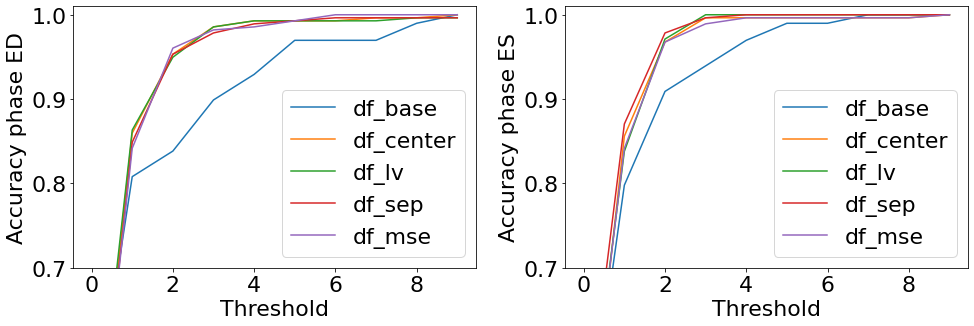

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig,axes = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = axes

threshs = list(range(10))
ed_accs = []
es_accs = []
for df_ in dfs.values():
    ed_accs.append([(df_['ED']<=t).sum()/len(df_) for t in threshs])
    es_accs.append([(df_['ES']<=t).sum()/len(df_) for t in threshs])
    
for ed_acc,es_acc in zip(ed_accs,es_accs):
    ax1.plot(threshs, ed_acc)
    ax2.plot(threshs, es_acc)

ax1.legend(list(dfs.keys()))
ax2.legend(list(dfs.keys()))
ax1.set_xlabel('Threshold')
ax2.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy phase ED')
ax2.set_ylabel('Accuracy phase ES')
ax1.set_ylim(0.7,1.01)
ax2.set_ylim(0.7,1.01)
plt.tight_layout()

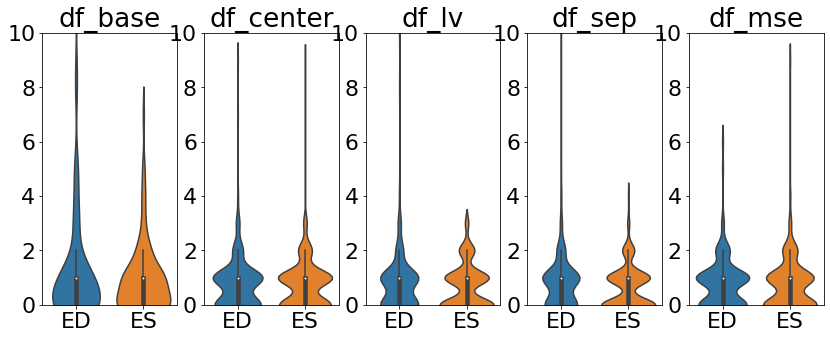

In [13]:
import seaborn as sb
fig,axes = plt.subplots(1,len(dfs.values()),figsize=(14,5))
for i, df_ in enumerate(dfs.values()):
    ax = axes[i]
    title = list(dfs.keys())[i]
    _ = ax.set_ylim(0,10)
    _ = ax.set_title(title)
    _ = sb.violinplot(data=df_[['ED','ES']], ax=ax)

# ACDC

In [17]:
import matplotlib.pyplot as plt
dfs_acdc = {}
dfs_acdc['df_base'] = df_merge
dfs_acdc['df_center'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/center/phaseloss0_2lstm32_acdc/2022-03-16_13_26/cfd.csv')
dfs_acdc['df_lv'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/lv/phaseloss0_2lstm32_acdc/2022-03-16_19_34/cfd.csv')
dfs_acdc['df_sep'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/septum/phaseloss0_2lstm32_acdc/2022-03-16_15_27/cfd.csv')
dfs_acdc['df_mse'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/mse/phaseloss0_2lstm32_acdc/2022-04-01_11_49/cfd.csv')
@interact
def calc_acc(dataframe = dfs_acdc.keys(),threshold=(0,10,1)):
    
    plt.rcParams.update({'font.size': 22})
    fig,axes = plt.subplots(1,2,figsize=(14,5))
    ax1, ax2 = axes
    
    df = dfs_acdc.get(dataframe)
    print('{:1.2f}'.format((df['ED']<=threshold).sum()/len(df)))
    print('{:1.2f}'.format((df['ES']<=threshold).sum()/len(df)))
    threshs = list(range(10))
    ed_acc = [(df['ED']<=t).sum()/len(df) for t in threshs]
    es_acc = [(df['ES']<=t).sum()/len(df) for t in threshs]
    
    ax1.plot(threshs, ed_acc)
    ax2.plot(threshs, es_acc)
    ax1.legend(['vol', 'center', 'lv', 'sep'])
    ax2.legend(['vol', 'center', 'lv', 'sep'])
    ax1.set_xlabel('Threshold')
    ax2.set_xlabel('Threshold')
    ax1.set_ylabel('Accuracy phase ED')
    ax2.set_ylabel('Accuracy phase ES')
    ax1.set_ylim(0.7,1.01)
    ax2.set_ylim(0.7,1.01)
    plt.tight_layout()
    plt.show()
    return df.describe()

interactive(children=(Dropdown(description='dataframe', options=('df_base', 'df_center', 'df_lv', 'df_sep', 'd…

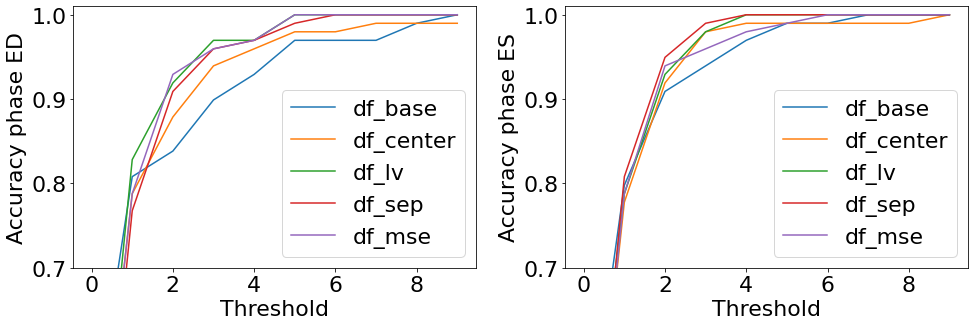

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig,axes = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = axes

threshs = list(range(10))
ed_accs = []
es_accs = []
for df_ in dfs_acdc.values():
    ed_accs.append([(df_['ED']<=t).sum()/len(df_) for t in threshs])
    es_accs.append([(df_['ES']<=t).sum()/len(df_) for t in threshs])
    
for ed_acc,es_acc in zip(ed_accs,es_accs):
    ax1.plot(threshs, ed_acc)
    ax2.plot(threshs, es_acc)

ax1.legend(list(dfs_acdc.keys()))
ax2.legend(list(dfs_acdc.keys()))
ax1.set_xlabel('Threshold')
ax2.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy phase ED')
ax2.set_ylabel('Accuracy phase ES')
ax1.set_ylim(0.7,1.01)
ax2.set_ylim(0.7,1.01)
plt.tight_layout()

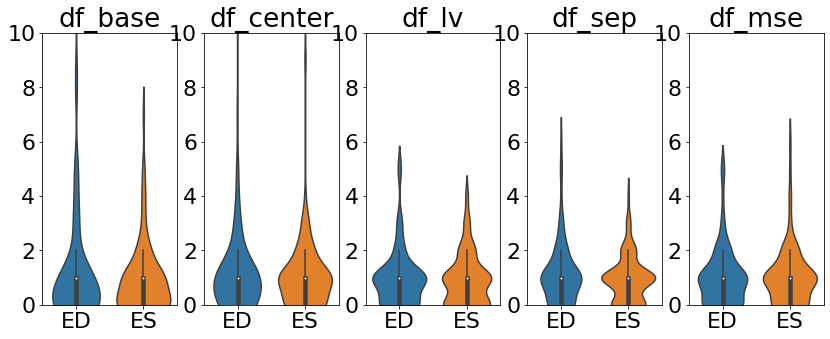

In [16]:
import seaborn as sb
fig,axes = plt.subplots(1,len(dfs_acdc.values()),figsize=(14,5))
for i, df_ in enumerate(dfs_acdc.values()):
    ax = axes[i]
    title = list(dfs_acdc.keys())[i]
    _ = ax.set_ylim(0,10)
    _ = ax.set_title(title)
    _ = sb.violinplot(data=df_[['ED','ES']], ax=ax)
plt.tight_layout()